In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
%matplotlib inline

In [2]:
df = pd.read_csv("../rol-scores.csv")

In [3]:
df.head()

,State,Pop. In Millions for 2012,RoLScore,elec_pros,pol_plur,free_expr,assoc_org,per_auto,2012GDP,hprop,hfisc,hbiz,hlab,htra,hinv
0,Albania,3.2,42.60,8,10,13,8,9,1.264810e+10,30,92.6,81.0,49.0,79.8,65
1,Argentina,41.1,51.94,11,15,14,11,13,4.755020e+11,15,64.3,60.1,47.4,67.6,40
2,Australia,22.7,73.28,12,15,16,12,15,1.532410e+12,90,66.4,95.5,83.5,86.2,80
3,Austria,8.4,73.15,12,15,16,12,15,3.947080e+11,90,51.1,73.6,80.4,86.8,85
4,Bangladesh,154.7,31.57,9,11,9,8,9,1.163550e+11,20,72.7,68.0,51.9,54.0,55


In [4]:
def boxplot(variables, 
            labels, 
            title="",
            numticks=3, 
            labelsize=12, 
            size=(10, 10),):
    arrays = [np.sort(np.array(x)) for x in variables]
    
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1, 1, 1)

    ax.set_title(title + '\n',
                 fontsize=labelsize * 1.25,
                 fontname='Lato')
    
    ax.locator_params(nbins=numticks)
    ax.tick_params(axis='both', 
                   which='both', 
                   length=0, 
                   labelsize = labelsize, 
                   pad=labelsize * 0.66,
                   labelcolor = (0.25, 0.25, 0.25))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color((0.1, 0.1, 0.1, 0.2))
    ax.spines['bottom'].set_color((0.1, 0.1, 0.1, 0.2))                  
                                                      
    bp = ax.boxplot(arrays, notch=True, sym="k.", labels=labels)
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color="black")
    return fig

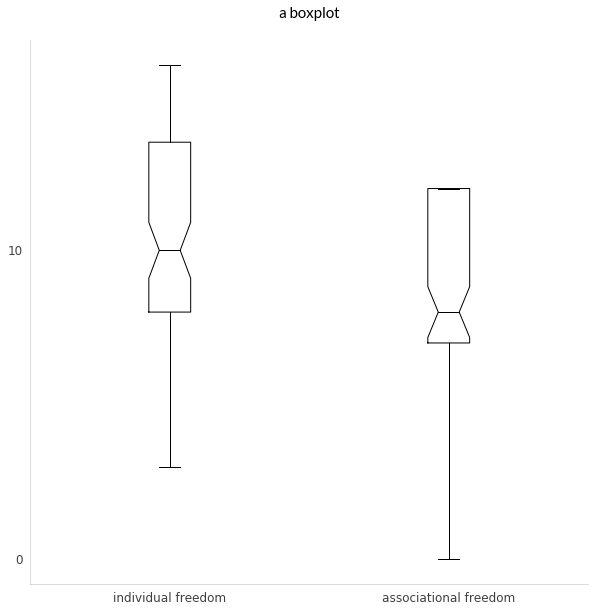

In [5]:
foo = boxplot([df["per_auto"], df["assoc_org"]],
              ["individual freedom", "associational freedom"], 
              "a boxplot")